In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# giotto-tda
import gtda.mapper

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

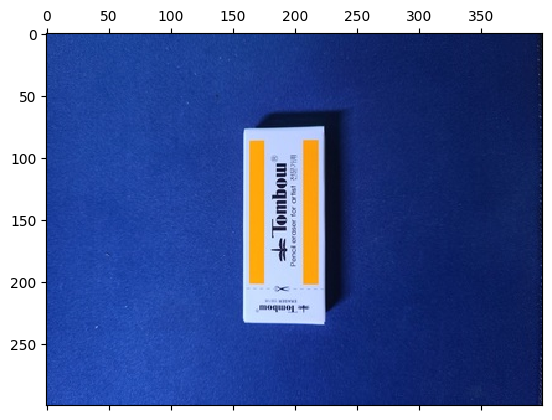

In [8]:
test = Image.open('imgs/eraser.jpg')
t = np.array(test)
p = t
plt.matshow(p)

300 400
(200, 200)


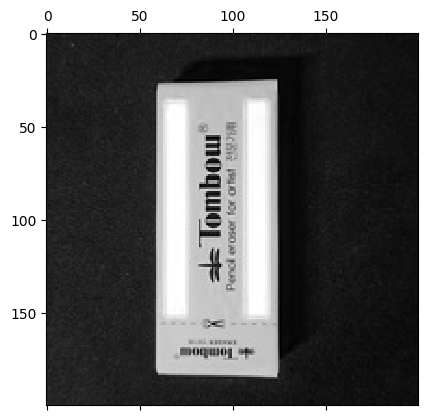

In [9]:
nr = len(p[:, 0])
nc = len(p[0, :])
print(nr, nc)  # rectangular image
p = t[50:250, 100:300, 0]
print(p.shape)
plt.matshow(p)

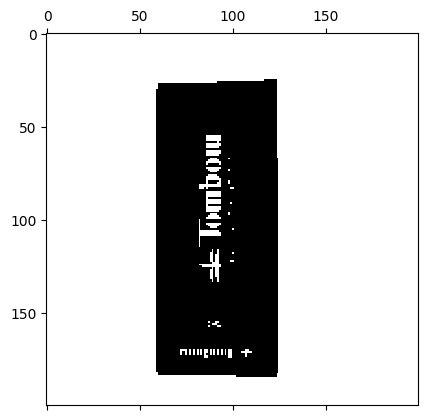

In [10]:
p[p[:, :] <= 100] = 1
p[p[:, :] > 100] = 0
plt.matshow(p)
plt.gray()

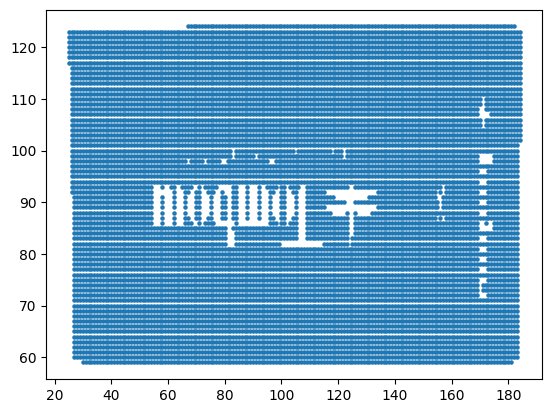

<Figure size 640x480 with 0 Axes>

In [13]:
nr = 200
x = []
y = []
for i in range(0, nr):
    for j in range(0, nr):
        if p[i, j] == 0:
            x.append(i)
            y.append(j)
nn = len(x)
X = np.zeros((nn, nn))
X[:, 0] = x
X[:, 1] = y
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()
plt.gray()

In [14]:
# 1. Filter function
filter_func = gtda.mapper.Projection(columns=[0, 1])

# 2. Cover
cover = gtda.mapper.CubicalCover(n_intervals=10, overlap_frac=0.3)

# 3. Clustering
clusterer = DBSCAN()

pipe = gtda.mapper.make_mapper_pipeline(filter_func=filter_func,
                                        cover=cover,
                                        clusterer=clusterer,
                                        verbose=False)

fig = gtda.mapper.plot_static_mapper_graph(pipe, X)
fig.show()